<a href="https://colab.research.google.com/github/eyesonaplate/ITB-2022/blob/main/w8_vis_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ITB 22-2학기 8주차 시각화 과제**
*홍보광고학과 1911298 이지우*

### **문제**
다음 2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 시각화 과정, 즉 탐색적 데이터 분석(Exploratory Data Analysis)을 수행하고 검진결과의 특징을 보여주시오. 

health_data.csv  (31개 항목, 1만건 데이터) 
health_data_description.xlsx  (데이터 설명) 

- matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
- 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
- 시각화 결과를 해석하고  3가지의 인사이트 도출하기 
- 코드는 github에 올리고 주소 제출


### 필수 실행 코드

In [ ]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

# 해당 코드 실행 후 런타임을 다시 실행하면 한글이 깨지지 않음

In [ ]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 파일 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# csv파일 불러오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB 2022/health_data.csv")

In [ ]:
# 패키지 불러오기
import pandas as pd
import numpy as np


### **vis1. 10세 단위의 연령대별 금연비율 증감**을 보여주는 **라인 그래프**










**1) 데이터 전처리: 5세 단위의 연령대코드를 10세 단위로 바꾼 새로운 변수 '연령대' 추가**

엑셀에서 health_data.csv파일을 불러온 뒤 vlookup함수를 이용해 5세 단위의 연령대코드를 10대 미만, 10대, 20대,  ... , 70대, 80대 이상으로 구분한 후 '연령대'라는 새로운 변수에 저장

**2) 데이터 전처리: 결측치 제거**

In [ ]:
# '흡연상태'에 결측치가 포함된 행 제거
health_1 = health.copy()
health_1 = health_1.dropna(subset = ['흡연상태'], axis=0)   
print(health_1.isnull().sum())

**3) 데이터 전처리: 결측치 제거와 새로운 변수 '연령대 별 금연비율' 추가**

In [ ]:
# '금연중' 변수 추가
health_1 = health[['연령대','흡연상태']]
health_1['금연중'] = health_1['흡연상태']
print(health_1)

# 'NotNow'의 빈도수 파악
health_1 = health_1.replace({'금연중':'No'},np.NAN ) 
health_1 = health_1.replace({'금연중':'Yes'},np.NAN )
health_1 = health_1.replace({'금연중':'NotNow'},'yes')

health_age = health_1.groupby('연령대').count()
print(health_age)

In [ ]:
# '금연비율' 변수 추가
health_age.info()

health_age['금연비율'] = health_age['금연중']/health_age['흡연상태']*100
print(health_age)

**3) 데이터 시각화**

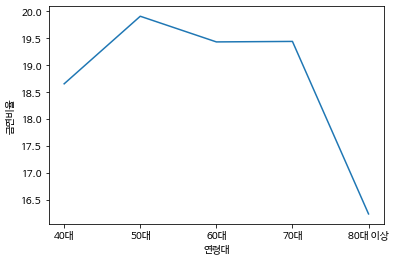

In [ ]:
# 라인 그래프
import seaborn as sns
sns.lineplot(data = health_age, x = '연령대', y = '금연비율')

**4) 결과 및 인사이트**

40대부터 80대 이상의 금연비율(흡연상태가 NotNow인 응답자의 빈도수/연령대별 흡연상태 응답자수*100)을 라인 그래프로 나타낸 결과는 다음과 같다.

40대부터 70대까지의 금연비율은 18~19%대로 거의 비슷한 수치를 나타내는 것을 알 수 있었다. 그 중 50대(19.9%)가 가장 높은 금연비율을 나타냈으며 50대가 지난 이후로는 금연비율이 점차 감소하는 추세를 보이고 있다. 특히 80대 이상의 금연비율은 16.2%로 50대에 비해 3.7%가 줄어든 것을 알 수 있다.

따라서 금연비율이 가장 큰 폭으로 증가하는 50대를 대상으로는 금연을 시작할 수 있는 캠페인의 집중 타겟으로 설정하는 것이 효과적이다. 한편 80대 이상이 될 때 금연비율이 가장 큰 폭으로 감소하므로 80대 이상을 대상으로는 금연을 유지할 수 있는 캠페인 시행이 효과적이다.


###**vis2. 트리글리세라이드와 총콜레스테롤의 상관관계**를 보여주는 **산점도 그래프**



**1) 데이터 전처리: 결측치 제거**

In [ ]:
# '트리글리세라이드' 또는 '총콜레스테롤'에 결측치를 포함한 행 제거
health_2 = health.copy()
health_2 = health_2.dropna(subset = ['트리글리세라이드'], axis=0)   
health_2 = health_2.dropna(subset = ['총콜레스테롤'], axis=0)  

print(health_2.isnull().sum())

#참고) health_2 = health_2[['트리글리세라이드','총콜레스테롤']].dropna(axis=0): 2개의 변수(열)만 남기는 방법

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
연령대               0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤            0
트리글리세라이드          0
HDL콜레스테롤          0
LDL콜레스테롤         67
혈색소               0
요단백              21
혈청크레아티닌           0
(혈청지오티)AST        0
(혈청지오티)ALT        0
감마지티피             0
흡연상태              0
음주여부              1
구강검진수검여부          0
치아우식증유무        2766
치석             2766
데이터공개일자           0
dtype: int64


**2) 데이터 전처리: 이상치 제거**

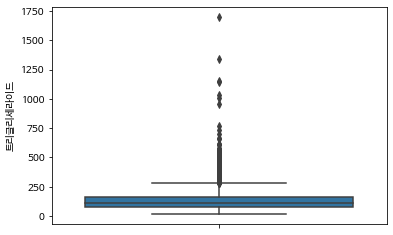

In [ ]:
# '트리글리세라이드'의 이상치 제거
sns.boxplot(data = health_2, y = '트리글리세라이드')

q1=health_2['트리글리세라이드'].quantile(0.25)
q3=health_2['트리글리세라이드'].quantile(0.75)
iqr1=q3-q1

condition1 = health_2['트리글리세라이드']>q3+1.5*iqr1
a = health_2[condition1].index
health_2.drop(a,inplace=True)

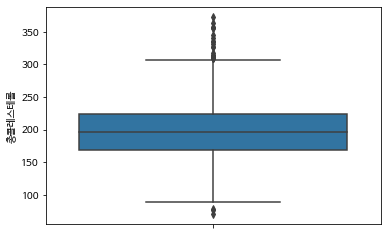

In [ ]:
# '총콜레스테롤'의 이상치 제거
sns.boxplot(data = health_2, y = '총콜레스테롤')

q2=health_2['총콜레스테롤'].quantile(0.25)
q4=health_2['총콜레스테롤'].quantile(0.75)
iqr2=q4-q2

condition2 = health_2['총콜레스테롤']>q4+1.5*iqr2
b = health_2[condition2].index
health_2.drop(b,inplace=True)


**3) 데이터 시각화**

[(200.0, 320.0), (150.0, 300.0)]

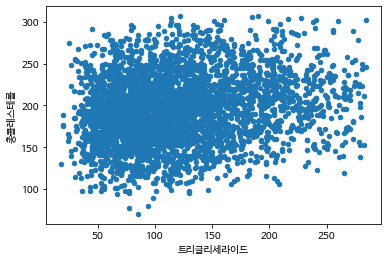

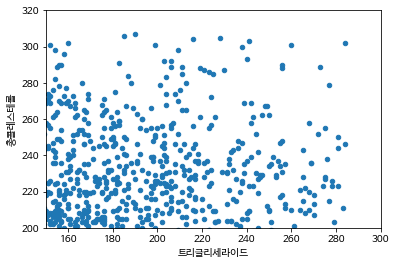

In [ ]:
# 산점도 그래프1: 모든 범위
health_2.plot(kind='scatter',x='트리글리세라이드',y='총콜레스테롤')

# 산점도 그래프2: TG와 총콜레스테롤 모두 비정상적 수치일 때
health_2.plot(kind='scatter',x='트리글리세라이드',y='총콜레스테롤') .set(xlim=(150,300),ylim=(200,320))

**4) 상관관계 분석**

In [ ]:
# 피어슨상관계수 도출
health_corr = health_2[['트리글리세라이드','총콜레스테롤']]

corr = health_corr.corr(method = 'pearson')
print(corr)

          트리글리세라이드    총콜레스테롤
트리글리세라이드  1.000000  0.226046
총콜레스테롤    0.226046  1.000000


**5) 결과 및 인사이트**

트리글리세라이드(이하 TG)는 지방의 한 형태로서 몸의 주요 에너지원이다. 혈중 TG의 증가는 심혈관 질환 발병 증가와 관련이 있어 심혈관 질환 검사에 주로 사용된다. 한편, 세포막과 호르몬을 만드는 데에 사용되는 총콜레스테롤 역시 심혈관 질환의 위험도를 판별하기 위한 검사에 주로 사용된다. 이를 바탕으로 심혈관 질환 검사에 사용되는 TG와 총콜레스테롤 두 변수의 상관관계를 파악해보고자 했다.

산점도 그래프2: TG는 150미만일 때, 총콜레스테롤은 200미만일 때 정상적인 수치이며 여기서 벗어날 때 심혈관 질환 위험이 있다고 판단할 수 있다. 따라서 산점도 그래프의 x축의 최소값은 150, y축의 최소값은 200으로 정해 심혈관 질환이 의심되는 비정상적 수치에 해당하는 데이터를 산점도 그래프2로 나타냈다.

산점도 그래프1,2를 분석한 결과 산점도가 매우 분산되어 있으며 선형을 나타내고 있지 않았다. 즉, TG와 총콜레스테롤 두 변수 간의 상관관계는 매우 약하다는 것을 알 수 있다. 추가적으로 피어슨상관계수를 도출해 검정한 결과 피어슨상관계수의 값이 0.23으로 상관관계가 약하다는 것을 확인할 수 있다.

즉, TG와 총콜레스테롤의 증가는 심혈관 질환 발병 증가에 영향을 주고 있으나 TG와 총콜레스테롤이 서로 밀접한 관련을 갖고 있지는 않다는 것을 알 수 있다. TG가 정상적인 수치로 나오더라도 총콜레스테롤의 수치가 정상적이라고 할 수 없고, 총콜레스테롤이 비정상적이더라도 TG는 정상적인 수치가 나올 수 있으므로 심혈관 질환 검사 시 TG와 총콜레스테롤 수치를 모두 측정하는 것이 필요하다.


### **vis3. 성별과 음주여부에 따른 연령대별 감마지티피 평균**을 보여주는 **다중 막대 그래프**

**1) 데이터 전처리: 결측치 제거**

In [ ]:
# '음주여부'에 있는 결측치 제거
health_3 = health.copy()
health_3 = health_3.dropna(subset = ['음주여부'], axis=0)   
print(health_3.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
연령대               0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              0
구강검진수검여부          0
치아우식증유무        6748
치석             6748
데이터공개일자           0
dtype: int64


**2) 데이터 시각화**

In [ ]:
# 집단별 감마지티피 평균 만들기
health_mean = health_3.groupby(['성별코드','음주여부','연령대'], as_index = True).agg(평균감마지티피 = ('감마지티피','mean'))
health_df = health_mean.unstack()
print(health_df)

             평균감마지티피                                            
연령대              40대        50대        60대        70대     80대 이상
성별코드 음주여부                                                       
F    No    20.117512  24.451935  26.258679  22.885375  26.507042
     Yes   24.312802  28.630273  28.378981  24.819444  23.181818
M    No    36.365759  36.438547  33.565947  26.539171  35.207317
     Yes   57.833811  56.698723  54.132626  47.588983  54.785714


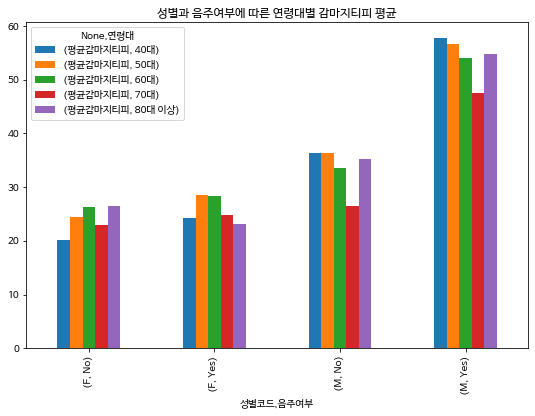

In [ ]:
# 다중 막대 그래프
health_df.plot(kind='bar', 
               figsize=(9,6), 
               title="성별과 음주여부에 따른 연령대별 감마지티피 평균")

**3) 결과 및 인사이트**

감마지티피(γ-GTP)는 주로 간에 분포하는 효소로 알코올에 민감하게 반응하며 간이나 담도에 질환이 있을 때 비교적 빠르게 이상치를 보이는 특성이 있어 간 질환 검사에 사용된다. 남성의 경우 63 IU/L이상, 여성의 경우 35IU/L이상일 때 이상치라고 볼 수 있다.

연령대별 감마지티피의 평균을 성별과 음주여부에 따라 4개의 그룹으로 나누어 다중막대그래프로 나타냈으며 그 결과는 다음과 같다.

먼저 4개의 그룹에 속한 연령대별 평균 감마지티피의 값이 모두 정상수치에 포함되고 있다. 한편, 80대 이상 여성을 제외하고 여성과 남성 모두 음주를 하는 경우가 그렇지 않은 경우에 비해 평균 감마지티피의 값이 높았다. 다만 여성의 경우 음주여부에 따른 평균 감마지티피 차이가 크게 드러나지 않은 반면 남성의 경우 음주여부에 따라 평균 감마지티피가 크게 차이를 보이고 있다.

그룹별로 가장 높은 수치를 보인 연령대를 찾아보면 술을 마시지 않는 여성은 80대 이상이, 술을 마시는 여성은 50대가, 술을 마시지 않는 남성은 40대와 50대가, 술을 마시는 남성은 40대임을 확인할 수 있다.

다중막대그래프의 결과를 바탕으로 다음과 같은 결론을 도출할 수 있다. 먼저, 남성의 경우 음주여부와 상관없이 40대와 50대에 평균 감마지티피 값이 비교적 높은 수치를 보였기 때문에 이 시기에 간 질환 검사를 집중적으로 받는 것을 권장하는 바이다.

또한 남성의 경우 음주여부가 감마지티피 수치에 큰 영향을 주고 있기 때문에 술을 줄이거나 아예 마시지 않는 것이 감마지티피 수치를 낮추는 데에 큰 도움이 될 것이다.

다음으로 여성의 경우 음주여부가 감마지티피 수치에 큰 영향을 미치는 것은 아니지만 80대 이상을 제외한 연령대에서 술을 마시는 집단이 그렇지 않은 집단에 비해 감마지티피 수치가 높았으므로 감마지티피 수치를 낮추고 싶다면 술을 줄이거나 끊는 것을 권장한다.  



